In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('unsupervised(elian).csv')

In [27]:
df.drop(['cluster'],axis=1, inplace=True)

In [28]:
df.isnull().sum()

price                           0
availability_365                0
room_type                       0
review_scores_rating            0
neighbourhood_group_cleansed    0
dtype: int64

In [29]:
df.head()

,price,availability_365,room_type,review_scores_rating,neighbourhood_group_cleansed
0,48.0,365,Private room,4.60,East Region
1,60.0,244,Private room,4.69,North-East Region
2,50.0,365,Private room,4.70,East Region
3,200.0,362,Entire home/apt,4.93,East Region
4,60.0,239,Private room,4.81,North-East Region


In [30]:
df.dropna()
df.isnull().sum()

price                           0
availability_365                0
room_type                       0
review_scores_rating            0
neighbourhood_group_cleansed    0
dtype: int64

In [31]:
le_room = LabelEncoder()
le_region = LabelEncoder()

In [32]:
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])
df['neighbourhood_group_cleansed_encoded'] =le_region.fit_transform(df['neighbourhood_group_cleansed'])

In [33]:
room_mapping = dict(zip(le_room.classes_,le_room.transform(le_room.classes_)))
region_mapping = dict(zip(le_region.classes_,le_region.transform(le_region.classes_)))

print("room type mapping: ", room_mapping)
print("region type mapping: ", region_mapping)

room type mapping:  {'Entire home/apt': 0, 'Private room': 1}
region type mapping:  {'East Region': 0, 'North Region': 1, 'North-East Region': 2, 'West Region': 3}


In [34]:
features = ['price', 'availability_365', 'room_type_encoded', 'neighbourhood_group_cleansed_encoded']
X = df[features].dropna()

In [35]:
# df.drop(['room_type', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

In [36]:
# df.to_csv('cleaned_unsupervised.csv', index=False)

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)

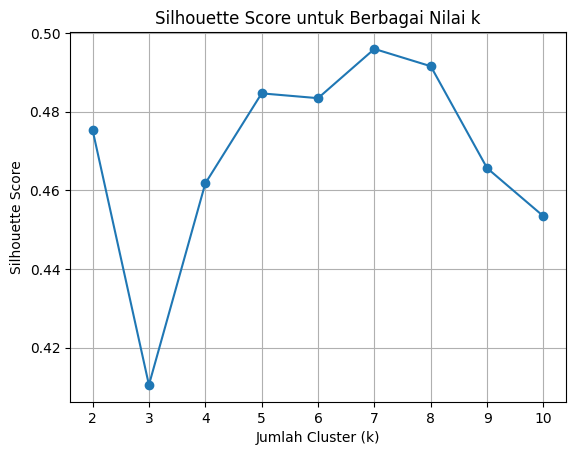

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Score untuk Berbagai Nilai k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [40]:
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print("Best k:", best_k)

Best k: 7


In [41]:
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
cluster_summary = X.groupby('cluster').mean()
print(cluster_summary)

              price  availability_365  room_type_encoded  \
cluster                                                    
0        101.619048        111.619048                1.0   
1         88.500000        173.708333                1.0   
2        369.545455        358.045455                0.0   
3        158.615385        271.230769                0.0   
4         84.291667        343.104167                1.0   
5        105.051724        332.965517                1.0   
6        755.250000        331.000000                0.0   

         neighbourhood_group_cleansed_encoded  
cluster                                        
0                                    0.095238  
1                                    2.583333  
2                                    2.545455  
3                                    0.384615  
4                                    2.770833  
5                                    0.241379  
6                                    2.250000  


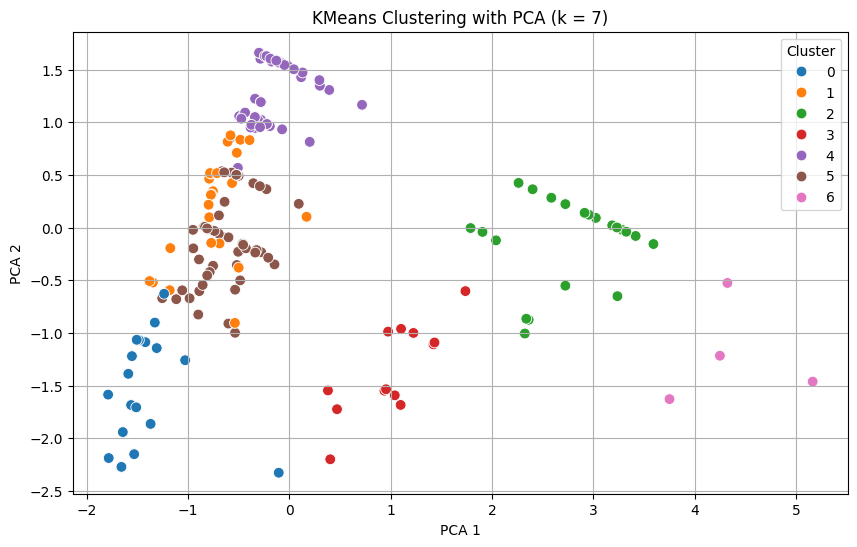

In [50]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering with PCA (k = {best_k})')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.savefig("cluster_pca.png", dpi=300, bbox_inches='tight')
plt.show()




In [ ]:
# plt.savefig("cluster_pca.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [45]:
import joblib

# # Assuming you used something like this in the notebook
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(df[["price", "availability_365", "review_scores_rating"]])

# # Save the model
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']